In [53]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import signal
from skimage.util import random_noise
from skimage import io, img_as_ubyte, filters

(410, 512)


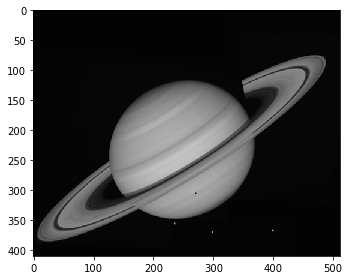

In [49]:
saturn = io.imread('images/saturn.png')
print(saturn.shape)
io.imshow(saturn)
io.show()

In [3]:
# convolve an impulse signal with an image
# will get you back the original image
impulse = signal.unit_impulse((3,3), (1, 1))
print(impulse)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [4]:
output = cv.filter2D(src=saturn, ddepth=-1, kernel=impulse)

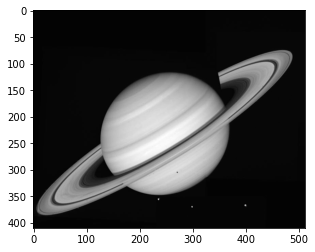

In [5]:
plt.imshow(output, cmap='gray')
plt.show()

In [6]:
# get Gaussian Kernel
size = 3
sigma = 1
kernel = cv.getGaussianKernel(size, sigma)
print(kernel)
gaussian_kernel = kernel * kernel.transpose()
print(gaussian_kernel)

[[0.27406862]
 [0.45186276]
 [0.27406862]]
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


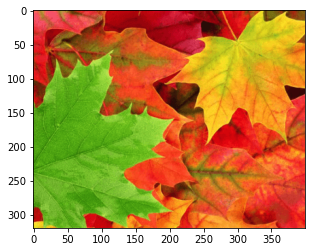

In [7]:
# Explore Edge Options
leaves = cv.imread('images/fall-leaves.png')
plt.imshow(leaves[..., ::-1])
plt.show()

In [8]:
# create a Gaussian filter
filter_size = 21
filter_sigma = 3
filter = cv.getGaussianKernel(filter_size, filter_sigma)
filter = filter * filter.transpose()

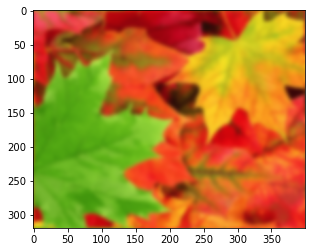

In [9]:
# apply filter and specify edge parameter
smoothed = cv.filter2D(src=leaves, ddepth=-1, kernel=filter, borderType=cv.BORDER_WRAP)
cv.imwrite('smoothed.png', smoothed)
plt.imshow(smoothed[..., ::-1])
plt.show()

## Convolved an Image with a Shifted Impulse
Convolving an image with a filter, say shifted to the right as seen below will give us the original mage shifted to the left.

In [10]:
# what if we convolve an image with
# 0 0 0
# 0 0 1
# 0 0 0
# what we get is the original image shifted to the left
shifted_impulse = signal.unit_impulse((3, 3), (1, 2))
print(shifted_impulse)

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [11]:
# convolve saturn with the shifted impulse
output = cv.filter2D(src=saturn, ddepth=-1, kernel=shifted_impulse)

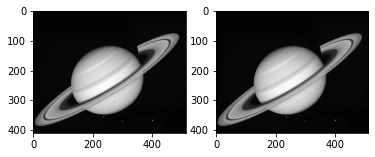

In [13]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(saturn, cmap='gray')
ax[1].imshow(output, cmap='gray')
plt.show()

In [23]:
blood_cells = cv.imread('images/blood-cells.png', 0)

## Apply an Unsharp mask to an Image
Filtering an image with an unsharp mask is the process of removing the blur from the image thereby making the image sharper.

In [24]:
# unsharp mask
blur_filter = np.ones((3, 3), dtype=np.float32)
blur_filter = (1 / 9) * blur_filter
sharp_filter = signal.unit_impulse((3, 3), (1, 1)) * 2

In [25]:
# subtracting the sharp_filter from the blur filter
unsharp_mask = sharp_filter - blur_filter

In [26]:
# applying it to the blood-cells image
output = cv.filter2D(src=blood_cells, ddepth=-1, kernel=unsharp_mask)

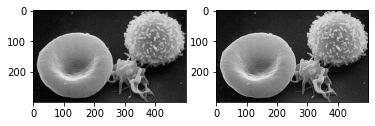

In [28]:
# plot both the original image and the sharper image
# cv.imwrite("sharper.png", output)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(blood_cells, cmap='gray')
ax[1].imshow(output, cmap='gray')
plt.show()

## Median Filter
Median filter is good for getting rid of noise that add sudden spikes to the pixels in the image, e.g salt and pepper noise. They are also called edge preservers and they work by replacing the pixel with the median in the filter.

In [29]:
moon = cv.imread('images/moon.png', 0)

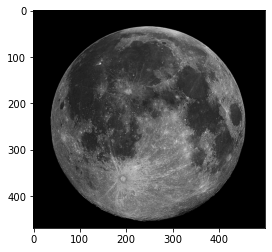

In [30]:
plt.imshow(moon, cmap='gray')
plt.show()

In [41]:
# add salt and pepper noise with density 0.02
noisy_moon = random_noise(moon, mode='s&p', seed=None, clip=True, amount=0.02)
noisy_moon = img_as_ubyte(noisy_moon)

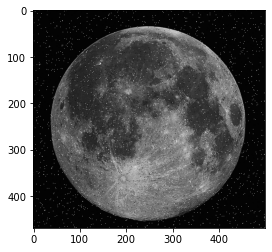

In [44]:
# cv.imwrite("noisy_moon.png", noisy_moon)
plt.imshow(noisy_moon, cmap='gray')
plt.show()

In [54]:
# apply a median filter
median_filtered = filters.median(noisy_moon)

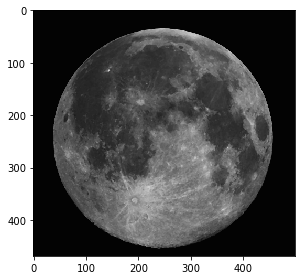

In [58]:
# io.imsave("median_filtered.png", median_filtered)
io.imshow(median_filtered)
io.show()